In [26]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from nameList import class_names

In [27]:
# Read image from file
def lecture_image(nom_image : str) -> np.ndarray:
    """A partir d'un nom de fichier renvoie l'image sous forme de tableau numpy"""
    image = cv.imread(f"DataSet/DataSetPostTraitement/{nom_image}",0)
    img = cv.resize(image, (250, 250), interpolation=cv.INTER_AREA)
    return img

In [28]:
def extractImagesAndLabels(path : str) -> list:
    """A partir d'un chemin renvoie la liste des fichiers"""
    Lnom = os.listdir(path)
    Lnom.remove('test')

    train_images = np.array([lecture_image(nom_image) for nom_image in Lnom]) #Récupération des images
    train_labels = np.array([int(nom_image.split("_")[0]) for nom_image in Lnom]) #Récupération des labels

    Lnom = os.listdir(path+"/test/")
    test_images = np.array([lecture_image("/test/" + nom_image) for nom_image in Lnom]) #Récupération des images
    test_labels = np.array([int(nom_image.split("_")[0]) for nom_image in Lnom]) #Récupération des labels

    #Normalisation des images
    train_images = train_images / 255.0
    test_images = test_images / 255.0

    return train_images, train_labels, test_images, test_labels

train_images, train_labels, test_images, test_labels = extractImagesAndLabels("DataSet/DataSetPostTraitement/")


In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])

In [30]:

def generateModel(train_images, train_labels, nbEpochs) -> tf.keras.Sequential:
    """Création du modèle"""
    #Construire le modèle
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(250, 250)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(15)
    ])

    #Compiler le modèle
    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    #Entrainer le modèle
    model.fit(train_images, train_labels, epochs=nbEpochs)

    return model

nbEpochs = 12
model = generateModel(train_images, train_labels, nbEpochs)

#Display the model's architecture
model.summary()

Epoch 1/12
3/3 [==============================] - 0s 53ms/step - loss: 51.8289 - accuracy: 0.0448
Epoch 2/12
3/3 [==============================] - 0s 54ms/step - loss: 91.7270 - accuracy: 0.1343
Epoch 3/12
3/3 [==============================] - 0s 53ms/step - loss: 76.4844 - accuracy: 0.1045
Epoch 4/12
3/3 [==============================] - 0s 53ms/step - loss: 64.0467 - accuracy: 0.0746
Epoch 5/12
3/3 [==============================] - 0s 53ms/step - loss: 37.4490 - accuracy: 0.2090
Epoch 6/12
3/3 [==============================] - 0s 54ms/step - loss: 24.1024 - accuracy: 0.3134
Epoch 7/12
3/3 [==============================] - 0s 52ms/step - loss: 17.7448 - accuracy: 0.2836
Epoch 8/12
3/3 [==============================] - 0s 52ms/step - loss: 16.4527 - accuracy: 0.3582
Epoch 9/12
3/3 [==============================] - 0s 53ms/step - loss: 12.5531 - accuracy: 0.3284
Epoch 10/12
3/3 [==============================] - 0s 53ms/step - loss: 9.5237 - accuracy: 0.4030
Epoch 11/12
3/3 [===

In [31]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 2.5381 - accuracy: 0.5217 - 67ms/epoch - 67ms/step

Test accuracy: 0.52173912525177


In [32]:
def makePrediction(model, test_images, test_labels) -> tf.keras.Sequential:
    """Calculer les prédictions"""
    probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)
    return predictions

predictions = makePrediction(model, test_images, test_labels)

1/1 [==============================] - 0s 34ms/step


In [33]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap='gray')

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(15))
  plt.yticks([])
  thisplot = plt.bar(range(15), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

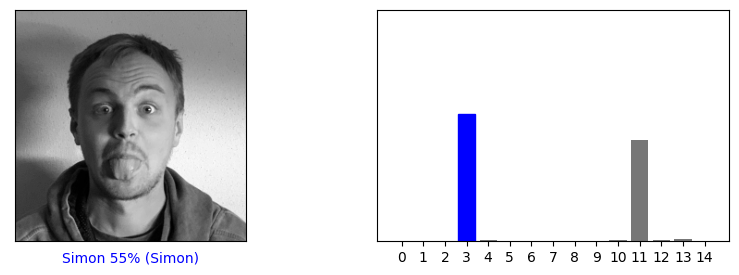

In [34]:
i = 12
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 7
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(3*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()